In [1]:
from pathlib import Path
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F

from torchvision.utils import make_grid


def show_image(image, filepath):
    plt.figure(figsize = (16, 8))
    plt.imshow(image.squeeze(0).permute(1, 2, 0).detach().cpu())
    plt.axis('off')
    plt.savefig(filepath)
    
    
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

FLOW_PATH = 'logs/mnist/MAF/version_1/'
MODEL_PATH = 'logs/mnist/ConvVAE/version_1/'

save_path = FLOW_PATH / Path('media')

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], device='cuda:0')
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], device='cuda:0')


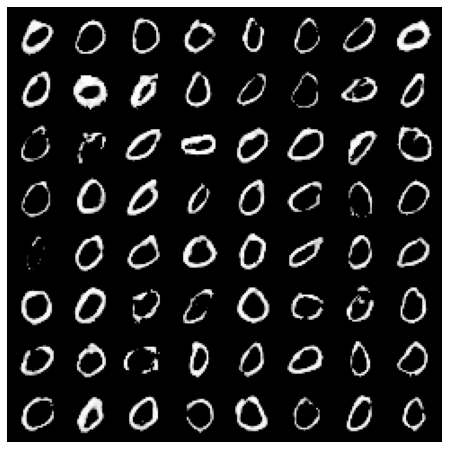

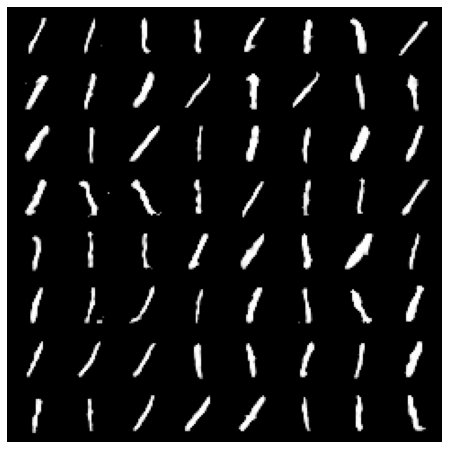

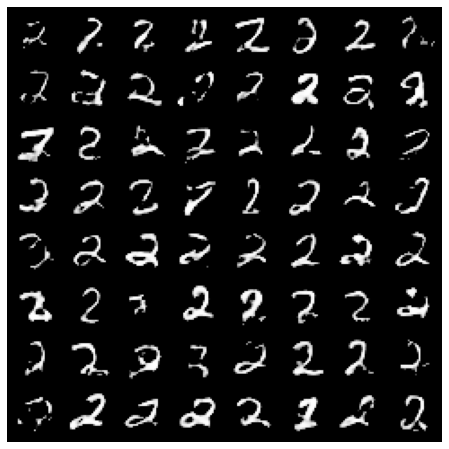

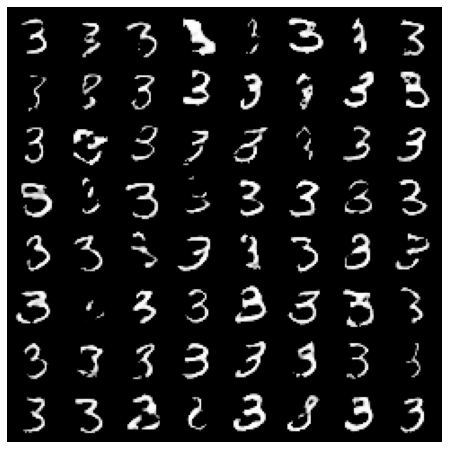

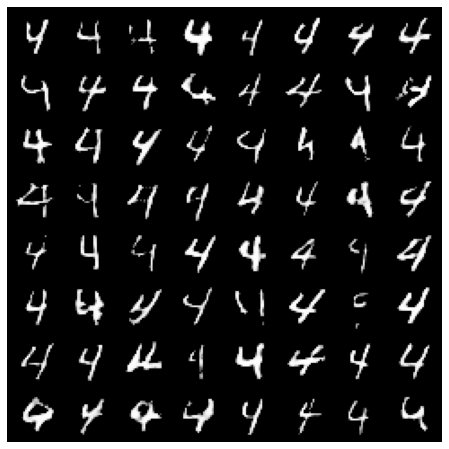

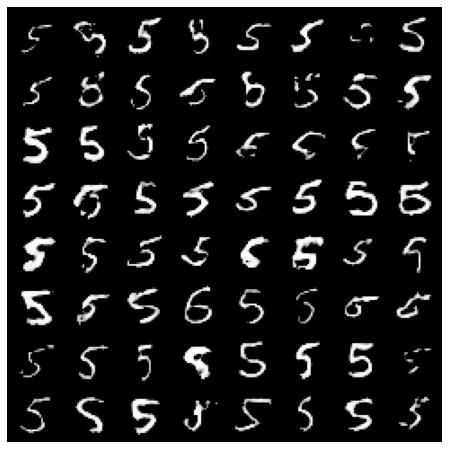

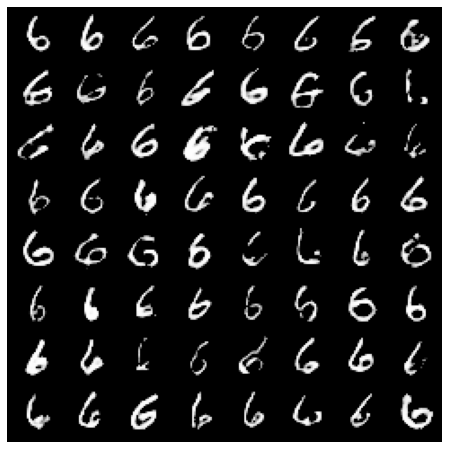

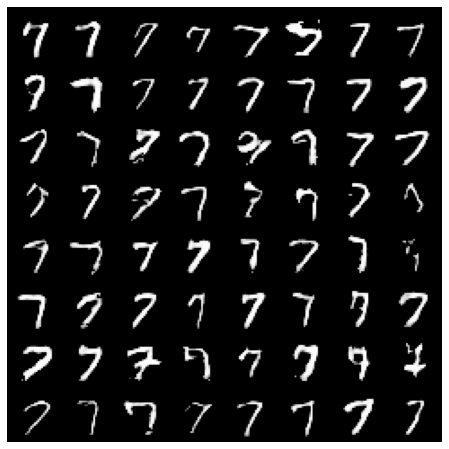

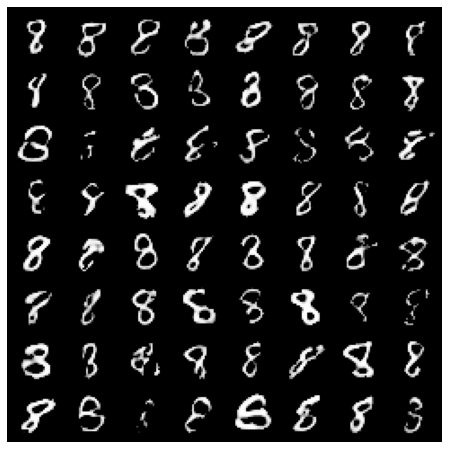

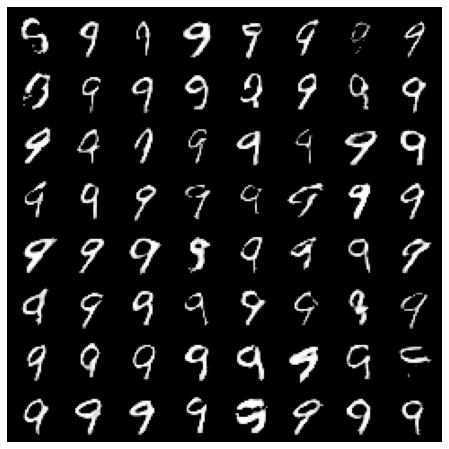

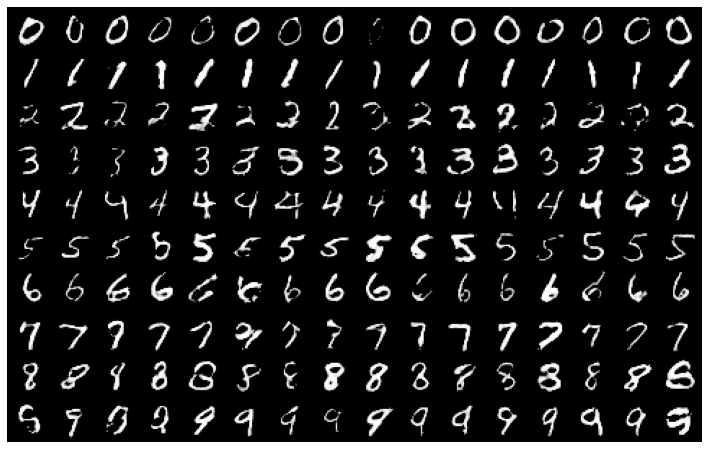

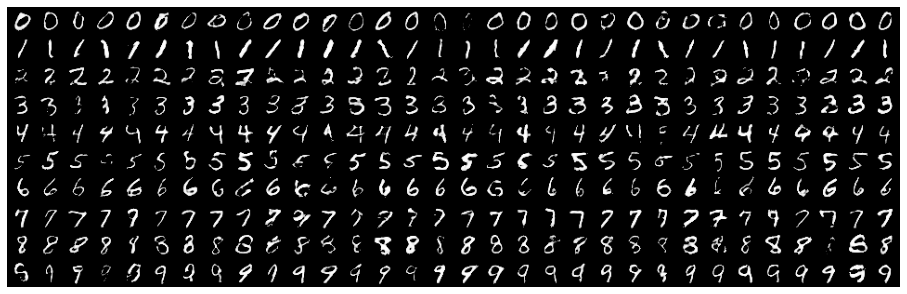

In [2]:
flow = torch.load(FLOW_PATH / Path('checkpoints/model.pkt')).to(DEVICE)
model = torch.load(MODEL_PATH / Path('checkpoints/model.pkt')).to(DEVICE)

n_samples = 64
n_row = 8

outputs = []

for i in range(10):
    context = torch.zeros(1, 10).to(DEVICE)
    context[0][i] = 1.0
    print(context)
    
    samples = flow.sample(n_samples, context).squeeze(0)
    output = model.decode(samples)
    outputs.append(output)
    show_image(
        (make_grid(output, nrow = n_row)), 
        filepath = save_path / Path(f"{i}.png")
    )

    
show_image(
    make_grid(torch.cat(outputs)[::4], 16), 
    filepath = save_path / Path("all-16.png")
)

show_image(
    make_grid(torch.cat(outputs)[::2], 32), 
    filepath = save_path / Path("all-32.png")
)